<a href="https://colab.research.google.com/github/souraOP/MNIST-MODEL-SOURA/blob/main/MNIST_by_Soura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [125]:
data_set = pd.read_csv('/content/train.csv')

In [126]:
data_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
#Loading our data
data_set = np.array(data_set)
data_values, features = data_set.shape
np.random.shuffle(data_set) # shuffling our data before splitting it into data_dev and training sets

data_dev = data_set[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:features]
x_dev = x_dev/255

training_data = data_set[1000:data_values].T
y_train = training_data[0]
x_train = training_data[1:features]
x_train = x_train / 255
_, m_train = x_train.shape


In [128]:
y_train

array([5, 9, 9, ..., 2, 9, 5])

In [135]:
def ReLU(Z):   
    return np.maximum(Z, 0)

def softmax(Z):
    #Compute softmax values for each sets of scores in x.
    exp = np.exp(Z - np.max(Z)) 
    return exp / exp.sum(axis=0)

def derivative_ReLU(Z):   #Derivative of Leaky ReLU
  return Z > 0

def one_hot(Y):     #took reference from other sites
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))  #9 + 1 = 10
  one_hot_Y[np.arange(Y.size), Y] = 1    #X-Axis: creates an array from 0 to data_values (no. of training examples). 
                                         #Y-Axis: no. of columns we are accessing
                                         #Function: for each row go to the column specified by the label Y and set it to 1
  one_hot_Y = one_hot_Y.T  #Transpose this-> since we want every column as an example
  return one_hot_Y

def first_parameters():
  W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
  B1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
  W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
  B2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
  return W1, B1, W2, B2

def forward_propagation(W1, B1, W2, B2, X):
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2
  A2 = softmax(Z2)
  return Z1, Z2, A1, A2

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
  one_hot_Y = one_hot(Y)
  m = Y.size
  dZ2 = 2*(A2 - one_hot_Y)
  dW2 = 1/m * dZ2.dot(A1.T)
  dB2 = 1/m * sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  dB1 = 1/m * sum(dZ1)
  return dW1, dW2, dB1, dB2

def parameters_update(W1, W2, B1, B2, dW1, dW2, dB1, dB2, alpha):
  W2 = W2 - alpha * dW2
  B2 = B2 - alpha * dB2
  W1 = W1 - alpha * dW1
  B1 = B1 - alpha * dB1
  return W1, B1, W2, B2

In [136]:
#Running our gradient descent
def gradient_descent(X, Y, alpha, iterations):
  W1, B1, W2, B2 = first_parameters()
  for i in range(iterations):
    Z1, Z2, A1, A2 = forward_propagation(W1, B1, W2, B2, X)
    dW1, dW2, dB1, dB2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, B1, W2, B2 = parameters_update(W1, W2, B1, B2, dW1, dW2, dB1, dB2, alpha)
    if (i % 10 == 0):
      print("No. of iterations: ", i)
      pred = output_pred(A2)
      print("Accuracy is: ", accuracy(pred, Y))
  return W1, B1, W2, B2

def output_pred(A2):
  return np.argmax(A2, 0)

def accuracy(pred, Y):
  print(pred, Y)
  return (np.sum(pred == Y)/Y.size)*100

In [137]:
W1, B1, W2, B2 = gradient_descent(x_train, y_train, 0.05, 500)

No. of iterations:  0
[0 2 9 ... 0 2 0] [5 9 9 ... 2 9 5]
Accuracy is:  16.17560975609756
No. of iterations:  10
[9 9 9 ... 0 9 0] [5 9 9 ... 2 9 5]
Accuracy is:  29.424390243902437
No. of iterations:  20
[8 4 9 ... 0 9 0] [5 9 9 ... 2 9 5]
Accuracy is:  40.236585365853664
No. of iterations:  30
[8 4 9 ... 0 9 0] [5 9 9 ... 2 9 5]
Accuracy is:  52.57560975609756
No. of iterations:  40
[8 4 9 ... 0 9 0] [5 9 9 ... 2 9 5]
Accuracy is:  67.99268292682927
No. of iterations:  50
[4 4 9 ... 0 9 0] [5 9 9 ... 2 9 5]
Accuracy is:  75.60487804878049
No. of iterations:  60
[4 4 9 ... 0 9 0] [5 9 9 ... 2 9 5]
Accuracy is:  78.77804878048781
No. of iterations:  70
[4 4 9 ... 2 9 0] [5 9 9 ... 2 9 5]
Accuracy is:  80.78780487804879
No. of iterations:  80
[4 4 9 ... 2 9 0] [5 9 9 ... 2 9 5]
Accuracy is:  82.20975609756097
No. of iterations:  90
[4 4 9 ... 2 9 0] [5 9 9 ... 2 9 5]
Accuracy is:  83.18292682926828
No. of iterations:  100
[4 4 9 ... 2 9 0] [5 9 9 ... 2 9 5]
Accuracy is:  84.129268292682

In [138]:
def predictionMaker(X, W1, B1, W2, B2):
  _, _, _, A2 = forward_propagation(W1, B1, W2, B2, X)
  pred = output_pred(A2)
  return pred

def predictionTesting(ind, W1, B1, W2, B2):
  initialImage = x_train[:, ind, None]
  pred = predictionMaker(x_train[:, ind, None], W1, B1, W2, B2)
  label = y_train[ind]
  print("Prediction is -> ", pred)
  print("Label is: ", label)
  initialImage = initialImage.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(initialImage, interpolation = 'nearest')
  plt.show()

Prediction is ->  [8 8 8 ... 8 8 8]
Label is:  8


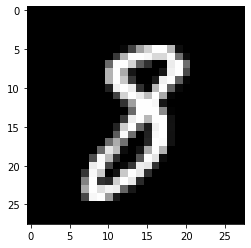

Prediction is ->  [2 2 2 ... 2 2 2]
Label is:  2


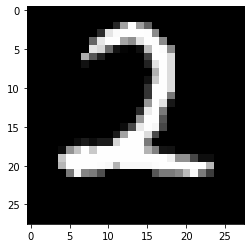

Prediction is ->  [3 3 3 ... 3 3 3]
Label is:  3


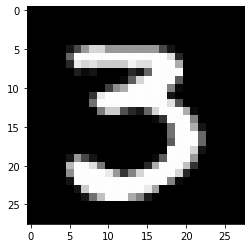

In [139]:
predictionTesting(89, W1, B1, W2, B2)
predictionTesting(30, W1, B1, W2, B2)
predictionTesting(54, W1, B1, W2, B2)